# Day 10 - Temporal-Difference Learning

## TD Prediction

* Where Monte Carlo methods update at the end of each episode, TD methods use bootstrapping to update at each time step

$$
\begin{align}
V(S_t)&\leftarrow V(S_t)+\alpha[R_{t+1}+\gamma V(S_{t+1})-V(S_t)] \\
&=(1-\alpha)V(S_t)+\alpha(R_{t+1}+\gamma V(S_{t+1}))
\end{align}
$$
* TD combines the sampling of Monte Carlo with the bootstrapping of DP methods, gaining the advantages of both
* In the update, $R_{t+1}+\gamma V(S_{t+1})-V(S_t)$ is called the TD-error $\delta_t$
* An example, estimating the time it takes to drive home:

|State                      |Elapsed Time (minutes)|Predicted Time to Go|Predicted Total Time|
|---------------------------|----------------------|--------------------|--------------------|
|leaving office, friday at 6|$0$                   |$30$                |$30$                |
|reach car, raining         |$5$                   |$35$                |$40$                |
|exiting highway            |$20$                  |$15$                |$35$                |
|2ndary road, behind truck  |$30$                  |$10$                |$40$                |
|entering home street       |$40$                  |$3$                 |$43$                |
|arrive home                |$43$                  |$0$                 |$43$                |

* The next week, you run into bumper-to-bumper traffic on the highway, estimating a total of 50 minutes to get home:

|State                      |Elapsed Time (minutes)|Predicted Time to Go|Predicted Total Time|
|---------------------------|----------------------|--------------------|--------------------|
|leaving office, monday at 6|$0$                   |$30$                |$30$                |
|stuck on highway           |$25$                  |$25$                |$50$                |

* Using TD, with $\alpha=\frac{1}{2}$, you can now update your estimate for getting home from the office immediately:

|State                      |Elapsed Time (minutes)|Predicted Time to Go      |Predicted Total Time|
|---------------------------|----------------------|--------------------------|--------------------|
|leaving office, monday at 6|$0$                   |$30+\frac{1}{2}(50-30)=40$|$40$                |
|stuck on highway           |$25$                  |$25$                      |$50$                |

### $Exercise\ \mathcal{6.1}$

#### If $V$ changes during the episode, then (6.6) only holds approximately; what would the difference be between the two sides? Let $V_t$ denote the array of state values used at time $t$ in the TD error (6.5) and in the TD update (6.2). Redo the derivation above to determine the additional amount that must be added to the sum of TD errors in order to equal the Monte Carlo error.

If $V$ changes during the episode, then the Monte Carlo error needs to explicitly take the time step $t$ into account:

$$
\begin{align}
G_t-V_t(S_t)&=R_{t+1}+\gamma G_{t+1}-V_t(S_{t+1})+\gamma V_{t+1}(S_{t+1})-\gamma V_{t+1}(S_{t+1}) \\
&=R_{t+1}+\gamma V_{t+1}(S_{t+1})-V_t(S_{t+1})+\gamma (G_{t+1}-V_{t+1}(S_{t+1})) \\
&=R_{t+1}+\gamma (V_t(S_{t+1})+[V_{t+1}(S_{t+1})-V_t(S_{t+1})])-V_t(S_{t+1})+\gamma (G_{t+1}-V_{t+1}(S_{t+1})) \\
&=(R_{t+1}+\gamma V_t(S_{t+1})-V_t(S_{t+1}))+\gamma \Delta_t+\gamma (G_{t+1}-V_{t+1}(S_{t+1})) \\
&=\delta_t+\gamma \Delta_t+\gamma (G_{t+1}-V_{t+1}(S_{t+1})) \\
&=\delta_t+\gamma \Delta_t+\gamma (\delta_{t+1}+\gamma \Delta_{t+1}+\gamma (G_{t+2}-V_{t+2}(S_{t+2}))) \\
&=\delta_t+\gamma \Delta_t+\gamma \delta_{t+1}+\gamma^2 \Delta_{t+1}+\gamma^2 (G_{t+2}-V_{t+2}(S_{t+2})) \\
&=\delta_t+\gamma \Delta_t+\gamma \delta_{t+1}+\gamma^2 \Delta_{t+1}+\gamma^2 \delta_{t+2}+\gamma^3 \Delta_{t+2}+\dots+\gamma^{T-1-t}\delta_{T-1}+\gamma^{T-t}\Delta_{T-1}  \\
&=\sum_{k=t}^{T-1}\gamma^{k-t}\delta_k+\sum_{k=t+1}^{T-1}\gamma^{k-t}\Delta_{k-1}, \\
\end{align}
$$
where $\Delta_t\doteq V_{t+1}(S_{t+1})-V_t(S_{t+1})$. So the additional amount added to the error is the change in $V$ over the course of the episode. The sum terminates at $\Delta_{T-2}$, because $\Delta_{T-1}=V_{T}(S_T)-V_{T-1}(S_T)=0-0=0$.

### $Exercise\ \mathcal{6.2}$

#### This is an exercise to help develop your intuition about why TD methods are often more efficient than Monte Carlo methods. Consider the driving home example and how it is addressed by TD and Monte Carlo methods. Can you imagine a scenario in which a TD update would be better on average than a Monte Carlo update? Give an example scenario—a description of past experience and a current state—in which you would expect the TD update to be better. Here’s a hint: Suppose you have lots of experience driving home from work. Then you move to a new building and a new parking lot (but you still enter the highway at the same place). Now you are starting to learn predictions for the new building. Can you see why TD updates are likely to be much better, at least initially, in this case? Might the same sort of thing happen in the original scenario?

When moving to a new building and parking lot, the Monte Carlo method would have to learn entirely new estimates of the first couple of states based on complete sample returns. Using TD, however, we can learn estimates as soon as we get on the highway, for which we still have our previous estimates to use as a target in the TD-error. This immediately propagates that information to our new beginning states.

## Advantages of TD Prediction Methods

* TD methods do not need a model of the environment, which is an advantage over DP methods
* TD methods can bootstrap, and learn from all transitions at all time steps, which is an advantage over Monte Carlo methods
* For any fixed policy $\pi$, TD($0$) has been proved to converge to $v_\pi$ (in the tabular case)
* Some proofs even extend to linear function approximation

### $Exercise\ \mathcal{6.3}$

#### From the results shown in the left graph of the random walk example it appears that the first episode results in a change in only $V(A)$. What does this tell you about what happened on the first episode? Why was only the estimate for this one state changed? By exactly how much was it changed?

The first episode ended in the terminal state on the left, with a reward of $0$. After this final step, the value $V(A)$ was updated to $V_1(A)=V_0(A)+\alpha(R_T+V(S_T)-V_0(A))=0.5+0.1(0+0-0.5)=0.45$.

### $Exercise\ \mathcal{6.4}$

#### The specific results shown in the right graph of the random walk example are dependent on the value of the step-size parameter, $\alpha$. Do you think the conclusions about which algorithm is better would be affected if a wider range of $\alpha$ values were used? Is there a different, fixed value of $\alpha$ at which either algorithm would have performed significantly better than shown? Why or why not?

The effect of the learning rate $\alpha$ is such that a lower learning rate will slow convergence, while also lowering the mean of the final error. The update steps are smaller, which means that, intially, the updates move the estimates towards the true value only very slowly, from the bias introduced by the initializtion of the estimates. Later on, when the estimates are close to the true value, a smaller step size means that the estimate overshoots this true value less on each update, staying closer to it. So for both methods, changing $\alpha$ will have the same effect of lowering variance, while increasing the time to convergence. This gives neither method a futher advantage over the other for some specifically chosen $\alpha$. However, both methods would perform significantly better in the (very) long run with much smaller learning rates, while converging faster with higher learning rates. The higher learning rates would continue raising the RMS error though, which would become unacceptably high quite quickly.

### $^*Exercise\ \mathcal{6.5}$

#### In the right graph of the random walk example, the RMS error of the TD method seems to go down and then up again, particularly at high $\alpha$’s. What could have caused this? Do you think this always occurs, or might it be a function of how the approximate value function was initialized?

As state C was initialized at its true value, the error here is at zero in the beginning, slowly increased by the noisy jumps introduced by the estimates of the neighboring states. Had the values been initialized arbitrarily, for example all at $0$, the error would likely never have reached the minimum seen in the right graph, and instead would have approached the slightly higher asymptotic error.

### $Exercise\ \mathcal{6.6}$

#### In Example 6.2 we stated that the true values for the random walk example are $\frac{1}{6}$, $\frac{2}{6}$, $\frac{3}{6}$, $\frac{4}{6}$, and $\frac{5}{6}$, for states A through E. Describe at least two different ways that these could have been computed. Which would you guess we actually used? Why?

As the environment dynamics are known, the values can be directly computed by solving the system of linear equations given by modified (action-free) Bellman equations. Alternatively, the symmetry of the problem can be exploited to immediately see that the value of state C must be the average of the values of the terminal state transitions, $0.5$. This has to be equal to the average of the values of its neighboring states, $B$ and $D$. The values of states $A$ and $E$ are "anchored" on one side each by the terminal state transitions' known rewards, as well as the values of states $B$ and $D$ respectively. Substituting gives very simple equations to quickly solve for the remaining values. Which method was likely used depends on the easily available tools. Given a convenient function for solving systems of linear equations given my Markov processes, doing this would be faster than solving it manually using the second method. Without a function like this, manually solving it by hand, using the second method, would have been much faster.

## Optimality of TD(0)

* Given a finite amount of experience, $batch\ updating$ refers to computing all update increments for all episode, and then only adjusting the value function estimate once, repeating this until convergence
* Both TD(0) and constant-$\alpha$ MC methods converge deterministically under these conditions, but to different answers
* While experiencing new episodes, after each new episode, batch updates are performed until convorgence, before adding the next episode
* TD(0) seems to perform better in practice, than MC methods, and it appears that this might be due to MC methods overfitting on the final returns in the training data
* Batch MC minimizes error on the training data, while batch TD(0) minimizes error on the $maximum$-$likelihood\ estimate$ of the real Markov process
* The maximum-likelihood parameter for the model of the process is the one that would most likely generate the data
* Batch TD(0) converges to the estimate that would be exactly correct if the maximum-likelihood estimate of the model was exactly correct, called the $certainty$-$equivalence\ estimate$
* While nonbatch-TD(0) does not converge directly to this, it can be understood as trying to move towards this

### $^*Exercise\ \mathcal{6.7}$

#### Design an off-policy version of the TD(0) update that can be used with arbitrary target policy $\pi$ and covering behavior policy $b$, using at each step $t$ the importance sampling ratio $\rho_{t:t}$ (5.3). 

$$
V(S_t)\leftarrow V(S_t)+\alpha\rho_{t:t}\left[R_{t+1}+\gamma V(S_{t+1})-V(S_t)\right]
$$

## Sarsa: On-policy TD Control

* Sarsa learns $Q$ instead of $V$, updating after every experienced $S_t, A_t, R_{t+1}, S_{t+1}$ and chosen $A_{t+1}$, which make up the name $SARSA$
* As this is also a Markov chain, the theorems for TD(0) apply here as well

### $Exercise\ \mathcal{6.8}$

#### Show that an action-value version of (6.6) holds for the action-value form of the TD error $\delta_t=R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t)$, again assuming that the values don’t change from step to step.

$$
\begin{align}
G_t-Q(S_t,A_t)&=R_{t+1}+\gamma G_{t+1}-Q(S_t,A_t)+\gamma Q(S_{t+1},A_{t+1})-\gamma Q(S_{t+1},A_{t+1}) \\
&=R_{t+1}+\gamma Q(S_{t+1},A_{t+1})-Q(S_t,A_t)+\gamma (G_{t+1}- Q(S_{t+1},A_{t+1})) \\
&=\delta_t+\gamma (G_{t+1}- Q(S_{t+1},A_{t+1})) \\
&=\delta_t+\gamma^2\delta_{t+1}+\gamma^2 (G_{t+2}- Q(S_{t+2},A_{t+2}))) \\
&=\delta_t+\gamma^2\delta_{t+1}+\gamma^3\delta{t+2}+\dots+\gamma^{T-1-t}\delta_{T-1} \\
&=\sum_{k=t}^{T-1}\gamma^{k-t}\delta_k
\end{align}
$$

### $Exercise\ \mathcal{6.9}\ Windy\ Gridworld\ with\ King's\ Moves\ (programming)$

#### Re-solve the windy gridworld assuming eight possible actions, including the diagonal moves, rather than four. How much better can you do with the extra actions? Can you do even better by including a ninth action that causes no movement at all other than that caused by the wind?

The ninth action is actually not necessary, as the agent can already reach the goal in the minimum required number of steps, which is 7.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import imageio
import os

from IPython.display import Image


class WindyGridWorld:
    def __init__(self, name=None):
        self.name = name
        self.height = 7
        self.width = 10
        self.grid = np.zeros((self.height, self.width), dtype=int)
        self.num_states = self.grid.size
        self.num_actions = 8
        self.start = (3, 0)
        self.goal = (3, 7)
        self.wind = np.array([0, 0, 0, 1, 1, 1, 2, 2, 1, 0], dtype=int)
        self.reset()

    def reset(self):
        self.state = self.start
        return np.ravel_multi_index(self.state, self.grid.shape)

    def step(self, action_index):
        terminal = False
        dr, dc = self.index_to_action(action_index)
        r, c = self.state
        w = self.wind[c]
        r = self.clamp_r(r + dr - w)
        c = self.clamp_c(c + dc)

        self.state = (r, c)
        if self.state == self.goal:
            self.reset()
            terminal=True

        return np.ravel_multi_index(self.state, self.grid.shape), -1, terminal

    def index_to_action(self, index):
        actions = np.array([
            (-1, -1), (-1, 0), (-1, 1),
            ( 0, -1),          ( 0, 1),
            ( 1, -1), ( 1, 0), ( 1, 1)
        ])
        return actions[index]

    def clamp(self, val, high):
        return max(0, min(high, val))

    def clamp_r(self, r):
        return self.clamp(r, self.height - 1)
        
    def clamp_c(self, c):
        return self.clamp(c, self.width - 1)

    def full_state(self, pos=None):
        if pos is None:
            pos = self.state
        grid = self.grid.copy()
        grid[self.start] = 1
        grid[self.goal] = 1
        grid[pos] = 2
        return grid

    def render_state(self):
        fig, ax = plt.subplots(figsize=(self.width, self.height))
        sns.heatmap(self.full_state(), ax=ax, cbar=False)
        ax.axis('off')
        plt.show()

    def render_episode(self, episode):
        frames = []
        for state in episode:
            fig, ax = plt.subplots(figsize=(self.width, self.height))
            pos = np.unravel_index(state, self.grid.shape)
            sns.heatmap(self.full_state(pos), ax=ax, cbar=False)
            ax.axis('off')
            plt.savefig('animations/temp_frame.png', bbox_inches='tight', pad_inches=0)
            frames.append(imageio.v2.imread('animations/temp_frame.png'))
            plt.close()

        if self.name is None:
            filename = 'episode_heatmap_wgw.gif'
        else:
            filename = f'episode_heatmap_{self.name}.gif'
        imageio.mimsave('animations/' + filename, frames, fps=2, loop=0)
        os.remove('animations/temp_frame.png')

In [2]:
from tqdm import tqdm


class Sarsa:
    def __init__(self, epsilon, alpha, grid_world):
        self.alpha = alpha
        self.epsilon = epsilon
        self.grid_world = grid_world
        self.num_states = grid_world.num_states
        self.num_actions = grid_world.num_actions
        self.Q = np.zeros((self.num_states, self.num_actions))
        self.ep_lengths = []

    def select_action(self, state):
        action = np.argmax(self.Q[state])
        if np.random.random() < self.epsilon:
            action = np.random.randint(0, self.num_actions)
        return action

    def train(self, num_episodes=8_000):
        for _ in tqdm(range(num_episodes)):
            state = self.grid_world.reset()
            action = self.select_action(state)
            done = False
            ep_length = 0
            while not done:
                ep_length += 1
                new_state, reward, done = self.grid_world.step(action)
                new_action = self.select_action(new_state)
                if done:
                    self.Q[state, action] += self.alpha * (reward - self.Q[state, action])
                else:
                    self.Q[state, action] += self.alpha * (
                        reward + self.Q[new_state, new_action] - self.Q[state, action]
                    )
                state, action = new_state, new_action
            self.ep_lengths.append(ep_length)

    def plot_ep_lengths(self):
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(self.ep_lengths)
        ax.set_xlabel("Episode")
        ax.set_ylabel("Steps to solve")
        plt.show()

    def play_episode(self):
        state = self.grid_world.reset()
        done = False
        episode = []
        while not done:
            episode.append(state)
            action = self.select_action(state)
            state, _, done = self.grid_world.step(action)

        return episode

In [3]:
epsilon = 0.01
alpha = 0.01

world = WindyGridWorld("Sarsa")
agent = Sarsa(epsilon, alpha, world)

100%|███████████████████████████████████████████████████████████████| 8000/8000 [00:01<00:00, 6177.64it/s]


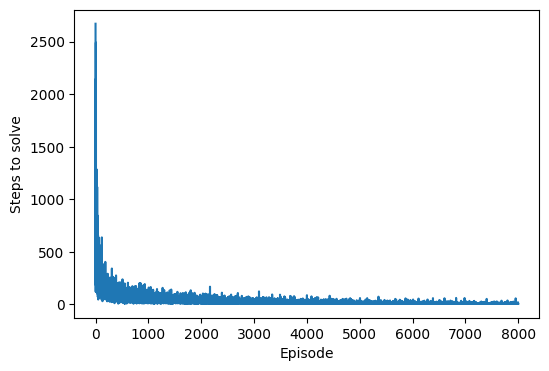

Average episode length for the last 1,000 episodes: 9.087


In [4]:
agent.train()
agent.plot_ep_lengths()
print(f"Average episode length for the last 1,000 episodes: {np.average(agent.ep_lengths[-1000:])}")

In [5]:
episode = agent.play_episode()
print("Episode finished! Rendering animation...")
world.render_episode(episode)
Image(url='animations/episode_heatmap_Sarsa.gif')

Episode finished! Rendering animation...


### $Exercise\ \mathcal{6.9}\ Stochastic\ Wind\ (programming)$

#### Re-solve the windy gridworld task with King’s moves, assuming that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous exercise, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell to the right of the goal and you move $\mathtt{left}$, then one-third of the time you move one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal.

Sure:

In [6]:
class StochasticWindyGridWorld(WindyGridWorld):
    def __init__(self, name=None):
        super().__init__(name)

    def step(self, action_index):
        terminal = False
        dr, dc = self.index_to_action(action_index)
        r, c = self.state
        w = self.wind[c]
        if w != 0:
            rand = np.random.random()
            if rand < 1/3:
                w -= 1
            elif rand > 2/3:
                w += 1
        r = self.clamp_r(r + dr - w)
        c = self.clamp_c(c + dc)

        self.state = (r, c)
        if self.state == self.goal:
            self.reset()
            terminal=True

        return np.ravel_multi_index(self.state, self.grid.shape), -1, terminal

In [7]:
epsilon = 0.01
alpha = 0.01

world = StochasticWindyGridWorld("Stochastic Sarsa")
agent = Sarsa(epsilon, alpha, world)

100%|██████████████████████████████████████████████████████████| 100000/100000 [00:08<00:00, 11804.26it/s]


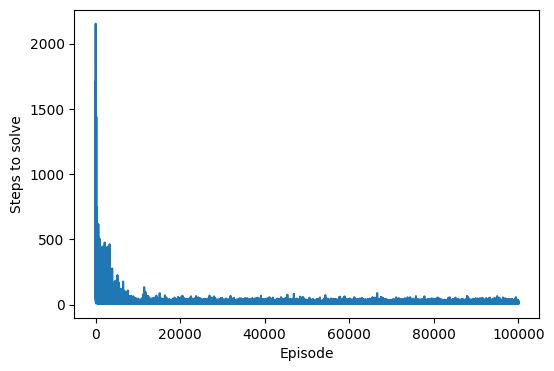

Average episode length for the last 10,000 episodes: 11.3343


In [8]:
agent.train(100_000)
agent.plot_ep_lengths()
print(f"Average episode length for the last 10,000 episodes: {np.average(agent.ep_lengths[-10000:])}")

In [9]:
episode = []
for _ in range(10):
    episode += agent.play_episode()
print("Episode finished! Rendering animation...")
world.render_episode(episode)
Image(url='animations/episode_heatmap_Stochastic Sarsa.gif')

Episode finished! Rendering animation...


## Q-learning: Off-policy TD Control

* In Q-learning the update rule is nearly the same as Sarsa's, except that the maximum action value is chosen for the update, instead of the next action to actually be taken

$$
Q(S_t,A_t)\leftarrow Q(S_t,A_t)+\alpha\left[R_{t+1}+\gamma \underset{a}{\operatorname{max}}Q(S_{t+1},a)-Q(S_t,A_t)\right]
$$
* The updates are independent of the policy followed, but this policy still decides *which* states are updated
* As long as all state-action pairs are sampled, $Q$ converges to $q_*$

### $Exercise\ \mathcal{6.11}$

#### Why is Q-learning considered an *off-policy* control method?

The updates in Q-learning are not done according to the policy used, but according to the policy greedy with respect to the current estimates. As this is done for action-values, this means that no importance sampling has to be involved.

### $Exercise\ \mathcal{6.12}$

#### Suppose action selection is greedy. Is Q-learning then exactly the same algorithm as Sarsa? Will they make exactly the same action selections and weight updates? 

As they are both greedy with respect to their current action-value estimates, they will take the same actions, as long as their estimates are equal. Since the Q-learning estimate assumes the maximizing action, this is the same as using the actually selected action for the update, if the action is selected greedily. So, in the greedy case, they are equal.

In [10]:
from wgw_q import *

epsilon = 0.01
alpha = 0.01

world = StochasticWindyGridWorld("Stochastic Q")
agent = QLearning(epsilon, alpha, world)

100%|███████████████████████████████████████████████████████████| 100000/100000 [00:10<00:00, 9732.97it/s]


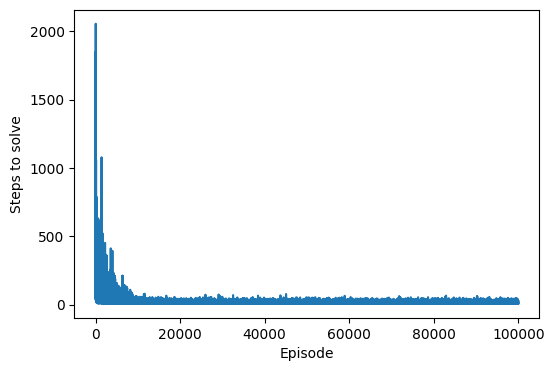

Average episode length for the last 10,000 episodes: 11.2437


In [11]:
agent.train(100_000)
agent.plot_ep_lengths()
print(f"Average episode length for the last 10,000 episodes: {np.average(agent.ep_lengths[-10000:])}")

In [12]:
episode = []
for _ in range(10):
    episode += agent.play_episode()
print("Episode finished! Rendering animation...")
world.render_episode(episode)
Image(url='animations/episode_heatmap_Stochastic Q.gif')

Episode finished! Rendering animation...


## Expected Sarsa

* Expected Sarsa calculates the expected value over next actions

$$
\begin{align}
Q(S_t,A_t)&\leftarrow Q(S_t,A_t)+\alpha\Biggl[R_{t+1}+\gamma\mathbb E_\pi\left[Q(S_{t+1},A_{t+1})|S_{t+1}\right]-Q(S_t,A_t)\Biggr] \\
&=Q(S_t,A_t)+\alpha\Biggl[R_{t+1}+\gamma\sum_{a}\pi(a|S_{t+1})Q(S_{t+1},a)-Q(S_t,A_t)\Biggr] \\
\end{align}
$$
* It is more compuationally complex than Sarsa, but eliminates the variance from random action selection
* Does the updates deterministically that Sarsa does in expectation
* When all randomness comes from the policy, and not the environment, Expected Sarsa can even set $\alpha=1$
* Expected Sarsa often has an empirical advantage over Sarsa
* It can be off-policy, for example by estimating the action-values of the greedy policy, in which case it is exaclty Q-learning
* Aside from the additional computational cost, it seems to dominate both Sarsa and Q-learning